<a href="https://colab.research.google.com/github/Starlight0901/Adult-Census-Income-Prediction/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducing the Dataset**

In [2]:
%pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [7]:
X["income"] = y
df = X
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [9]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### **Check for missing values and values with "?"**

In [10]:
missing_values = df.isnull()
missing_values.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print(missing_values.sum())

total = missing_values.sum().sum()
print("Total missing values = ", total)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Total missing values =  2203


In [12]:
rows_with_missing_values = df[missing_values.any(axis=1)]
rows_with_missing_values

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K


In [13]:
import numpy as np


# Count "?" values for each column
question_mark_counts = df.eq("?").sum()
print(question_mark_counts)

# Sum the counts across all columns
total_question_marks = question_mark_counts.sum()

print(f"Total number of '?' values in the DataFrame: {total_question_marks}")

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Total number of '?' values in the DataFrame: 4262


In [14]:
df.replace('?', np.NaN,inplace = True)

In [15]:
total_empty_values = df.isnull().sum()
total_empty_values

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [16]:
total_empty_values.sum()

6465

### **Replace all the missing values with the mode**

In [17]:
import pandas as pd

# Fill missing values with the mode of each column
df_filled = df.fillna(df.mode().iloc[0])

# Check if there are any missing values left
print(df_filled.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [18]:
df_filled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Data Visualization**

In [19]:
numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "income"]
numerical_data_df = df[numerical_columns].copy()
numerical_data_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


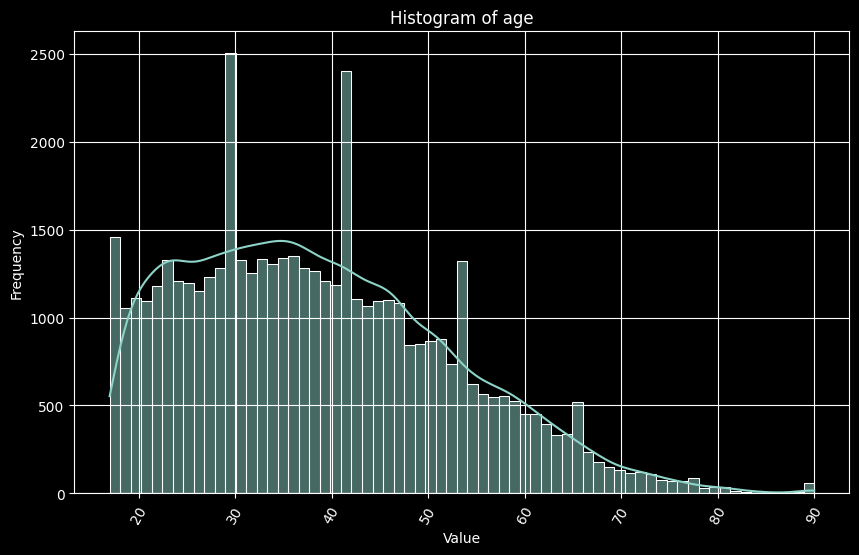

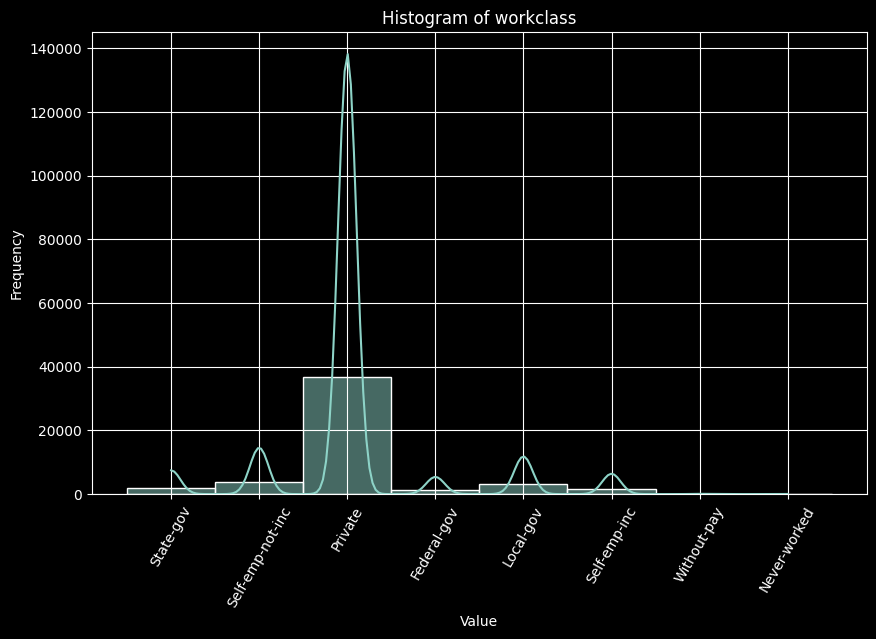

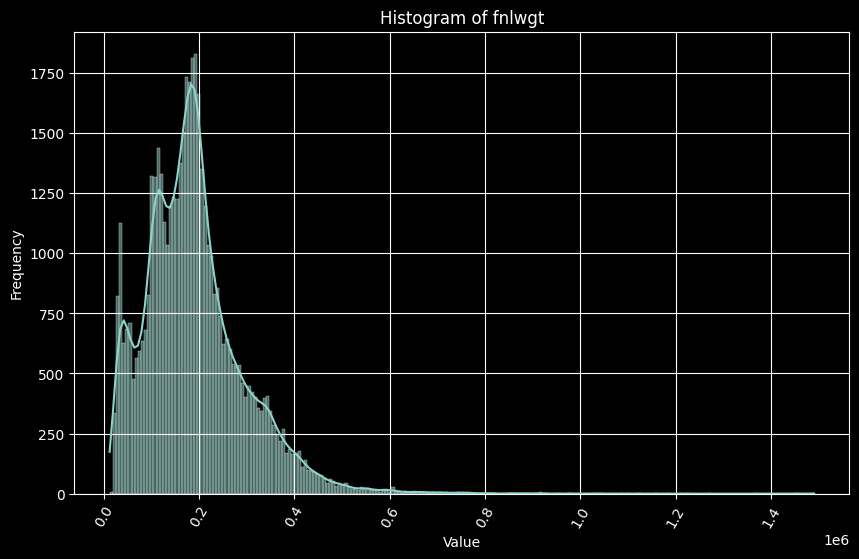

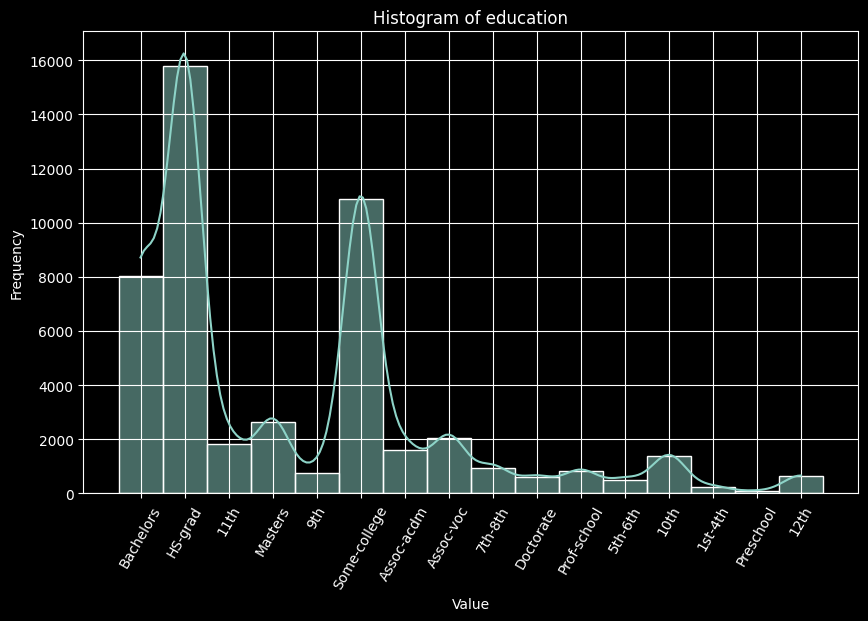

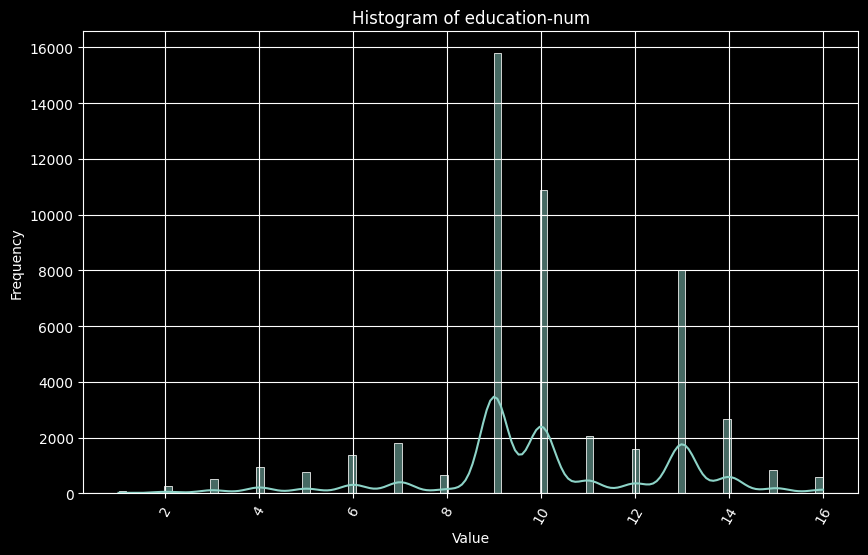

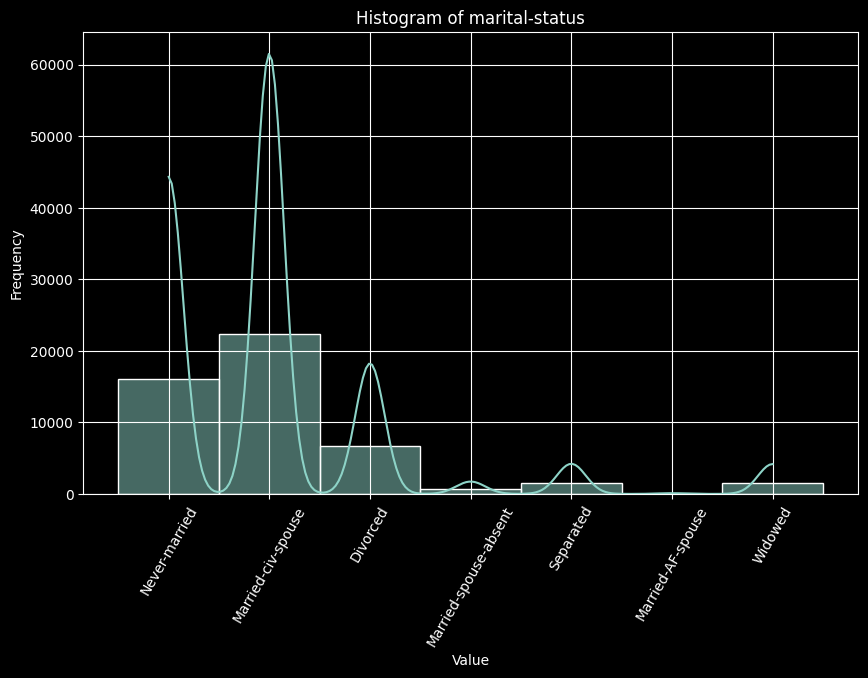

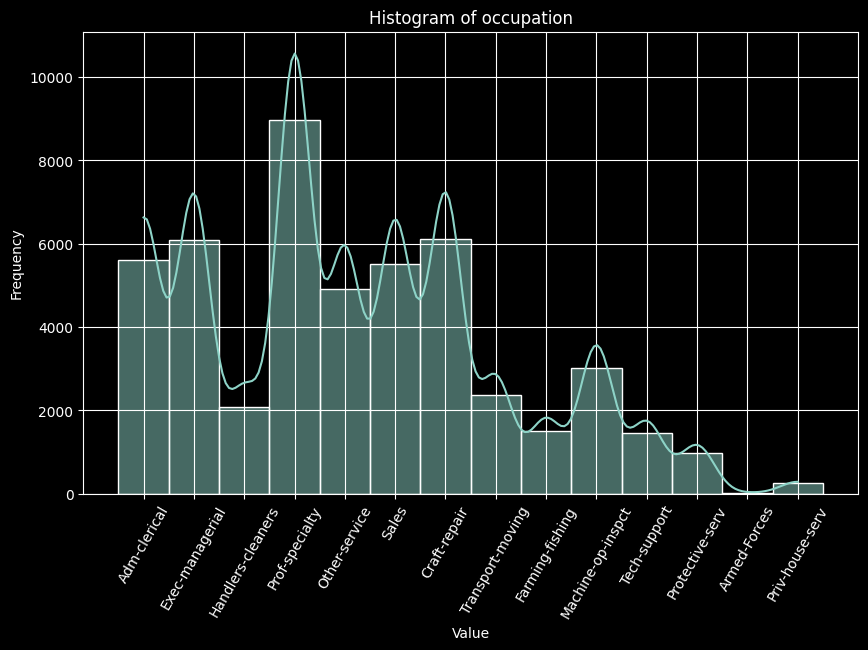

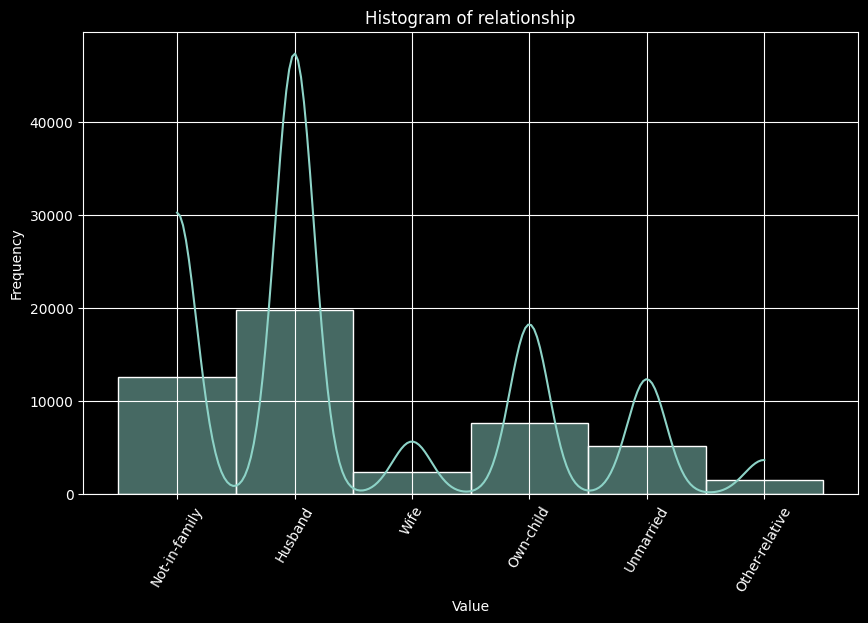

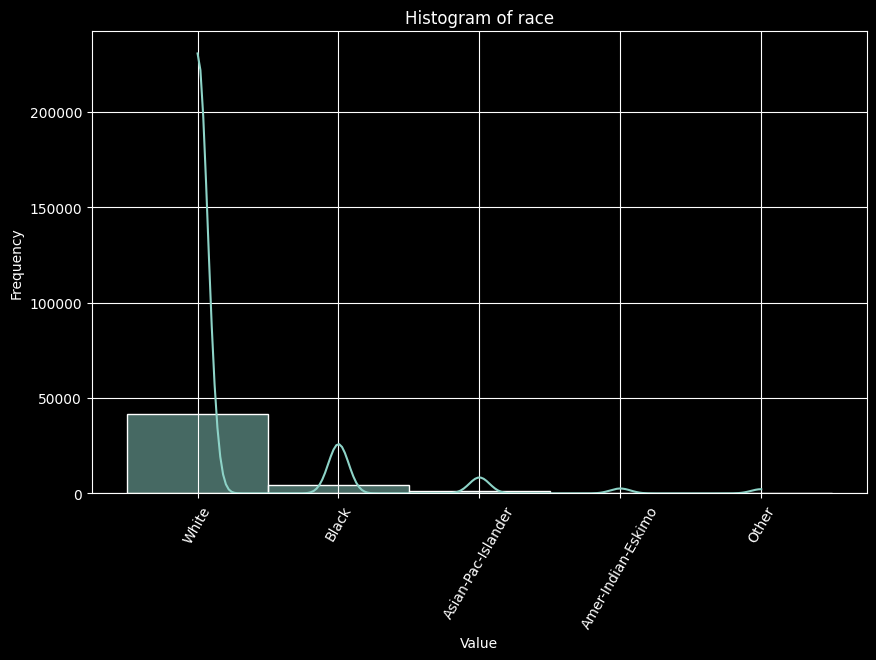

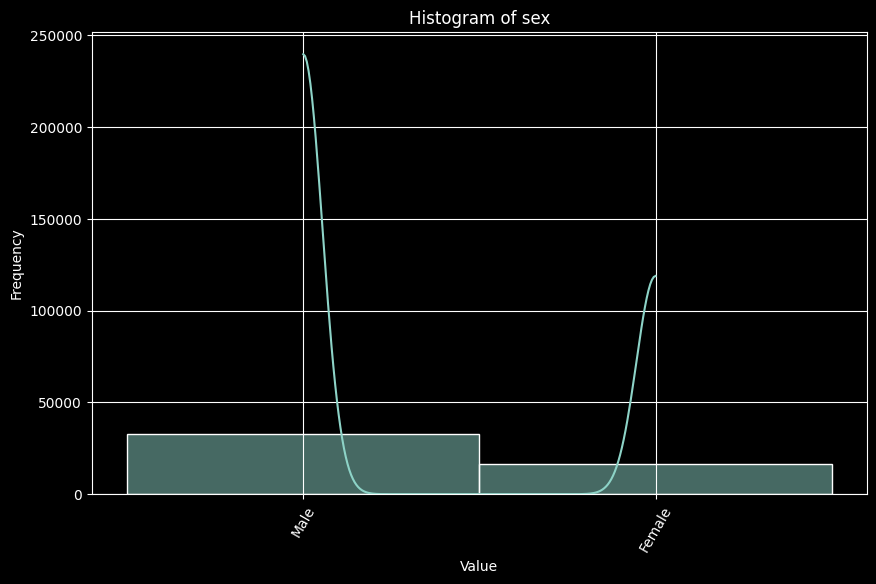

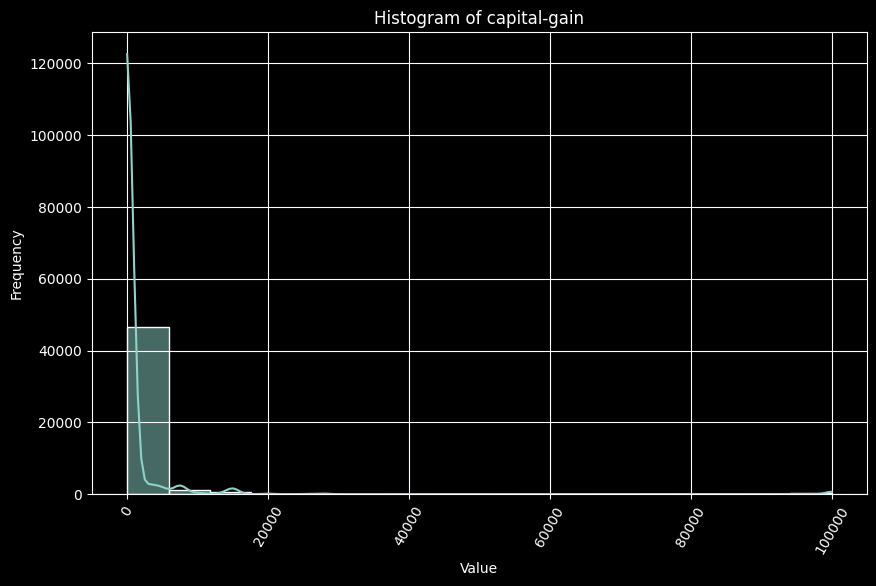

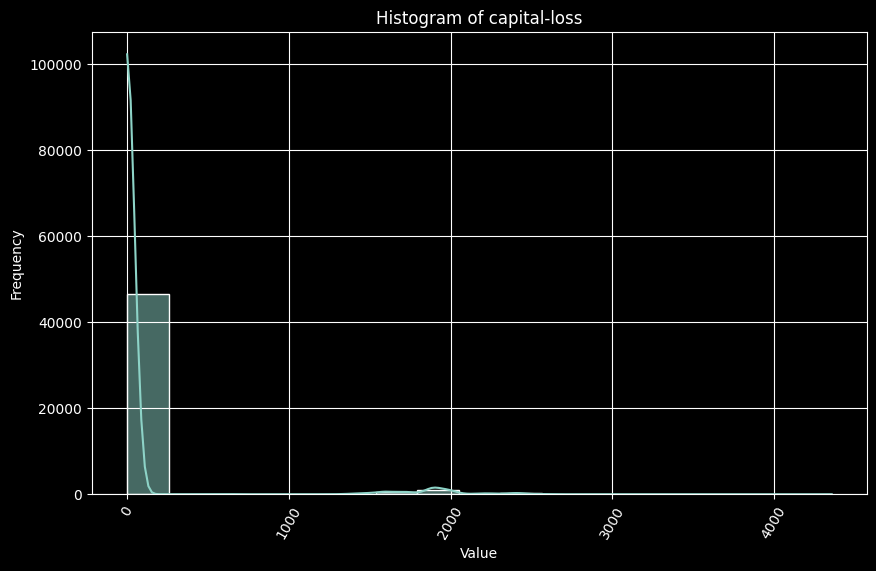

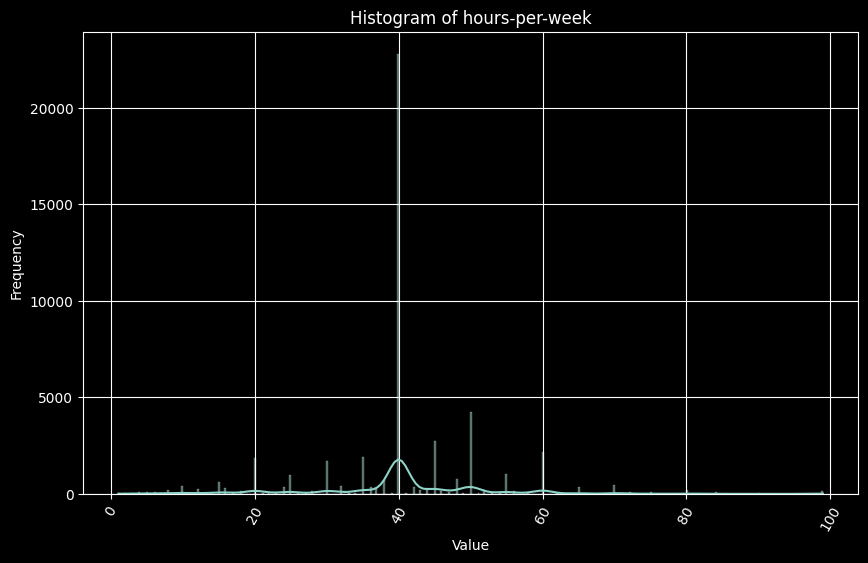

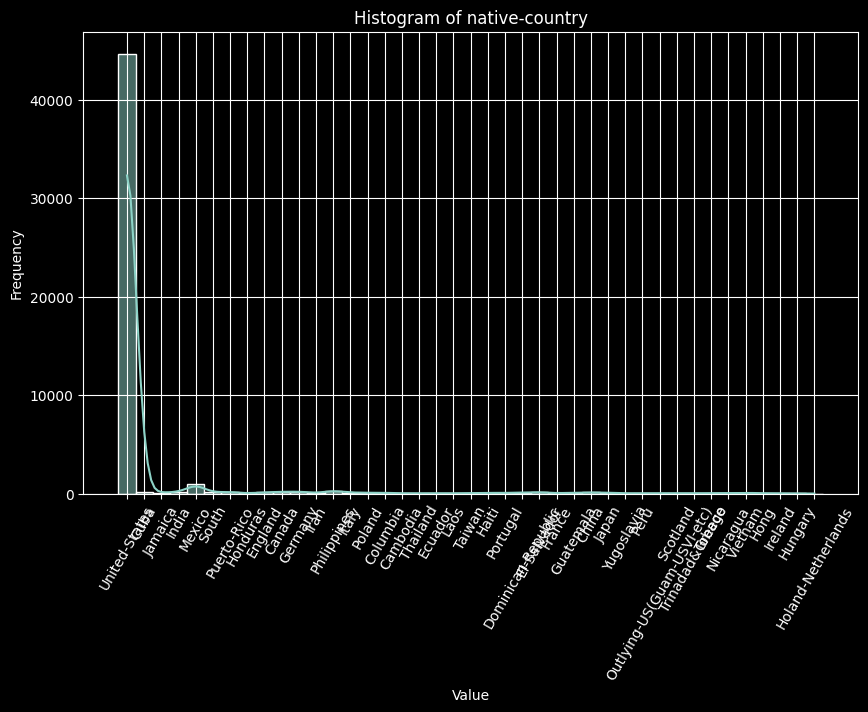

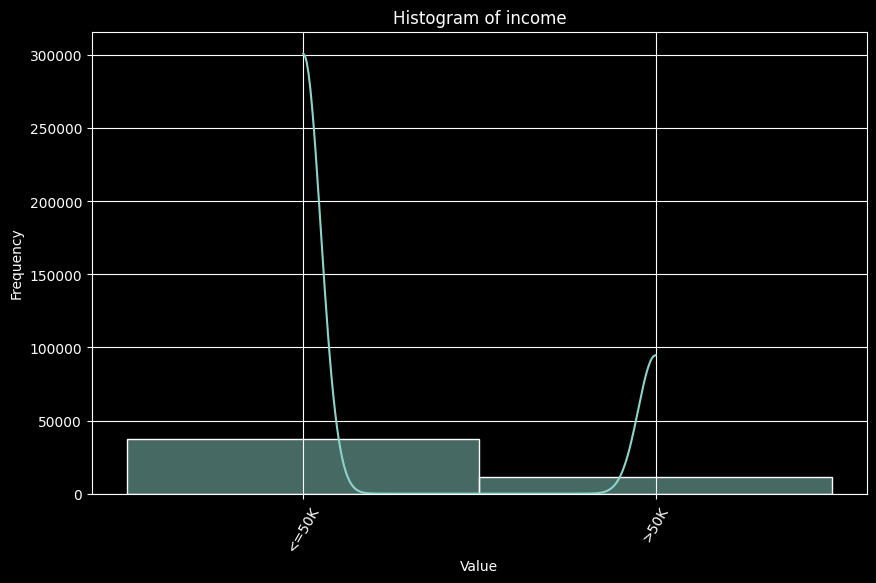

In [20]:
for column in df_filled.columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.histplot(data=df_filled, x=f'{column}', kde=True)
    #df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.grid(True)
    plt.show()

Checking for existing correlation before feature re-engineering

In [21]:
correlation_df = df_filled.copy()
correlation_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


<ipython-input-22-f03d49dfb514>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


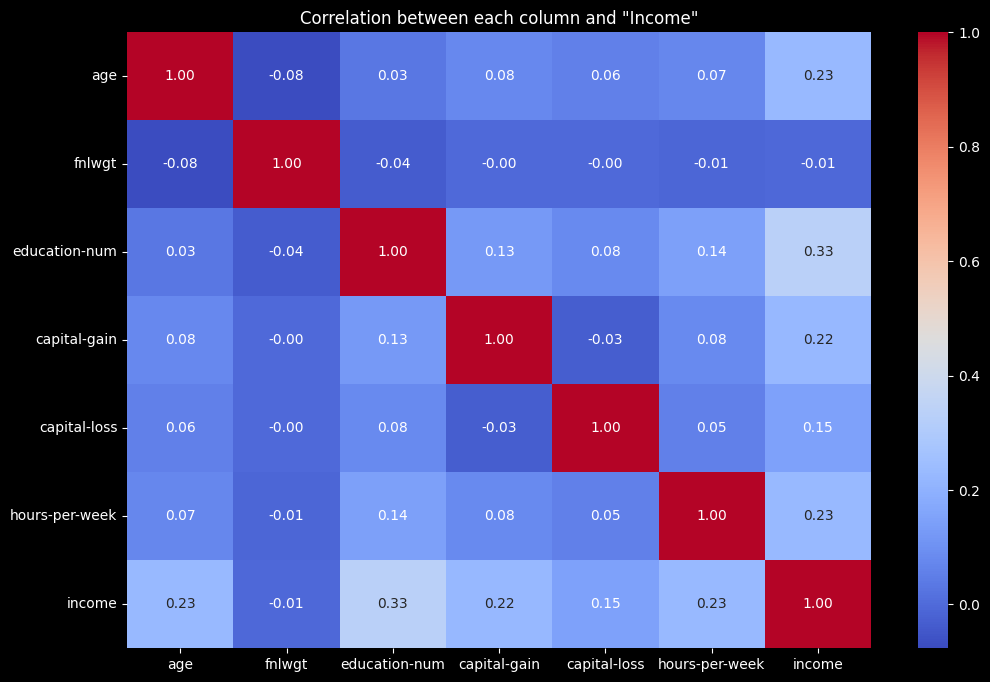

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
correlation_df['income'] = le.fit_transform(correlation_df['income'])

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

correlation_df['age'] = le.fit_transform(correlation_df['age'])
correlation_df['workclass'] = le.fit_transform(correlation_df['workclass'])
correlation_df['fnlwgt'] = le.fit_transform(correlation_df['fnlwgt'])
correlation_df['education'] = le.fit_transform(correlation_df['education'])
correlation_df['education-num'] = le.fit_transform(correlation_df['education-num'])
correlation_df['marital-status'] = le.fit_transform(correlation_df['marital-status'])
correlation_df['occupation'] = le.fit_transform(correlation_df['occupation'])
correlation_df['relationship'] = le.fit_transform(correlation_df['relationship'])
correlation_df['race'] = le.fit_transform(correlation_df['race'])
correlation_df['sex'] = le.fit_transform(correlation_df['sex'])
#df['capital-gain'] = le.fit_transform(df['capital-gain'])
#df['capital-loss'] = le.fit_transform(df['capital-loss'])
#df['hours-per-week'] = le.fit_transform(df['hours-per-week'])
correlation_df['native-country'] = le.fit_transform(correlation_df['native-country'])
correlation_df['income'] = le.fit_transform(correlation_df['income'])

correlation_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,9,12,4,0,1,4,1,2174,0,40,38,0
1,33,5,3788,9,12,2,3,0,4,1,0,0,13,38,0
2,21,3,18342,11,8,0,5,1,4,1,0,0,40,38,0
3,36,3,19995,1,6,2,5,0,2,1,0,0,40,38,0
4,11,3,25405,9,12,2,9,5,2,0,0,0,40,4,0
5,20,3,23149,12,13,2,3,5,4,0,0,0,40,38,0
6,32,3,11187,6,4,3,7,1,2,0,0,0,16,22,0
7,35,5,17735,11,8,2,3,0,4,1,0,0,45,38,1
8,14,3,1679,12,13,4,9,1,4,0,14084,0,50,38,1
9,25,3,11093,9,12,2,3,0,4,1,5178,0,40,38,1


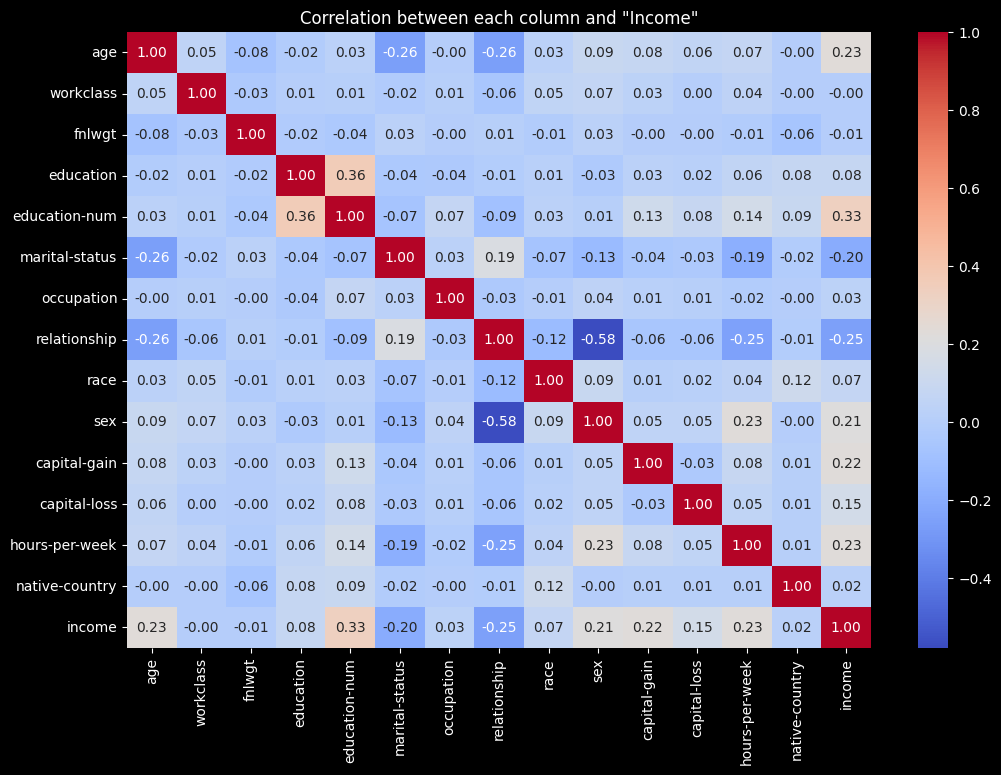

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


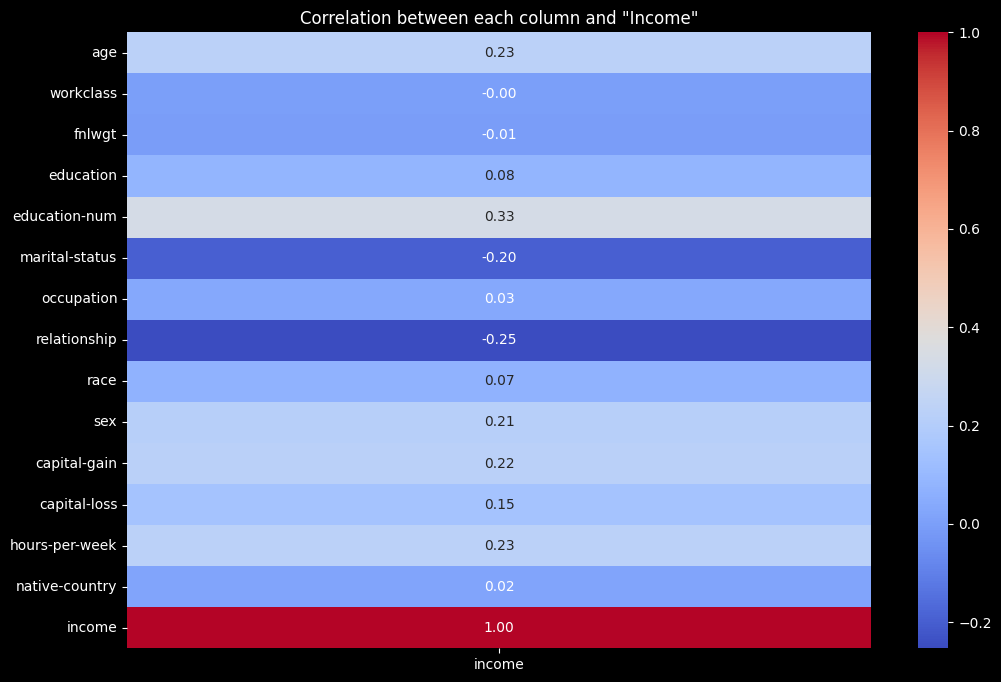

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(income_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


### **Identifying and handling outliers**

**Age**

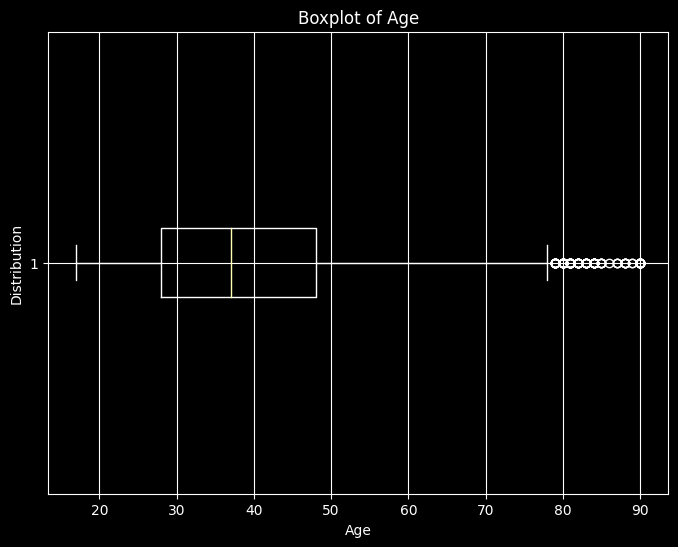

Minimum age: 17
Maximum age: 90


In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_age = df_filled['age'].min()
max_age = df_filled['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

In [32]:
# Calculate quartiles
Q1 = df_filled['age'].quantile(0.25)
Q3 = df_filled['age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_filled[(df_filled['age'] < lower_bound) | (df_filled['age'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers.shape)
print("Identified outliers:")
outliers

Lower bound for outliers: -2.0
Upper bound for outliers: 78.0
No of outliers:  (216, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48524,80,Private,107740,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
48564,80,Self-emp-not-inc,29441,7th-8th,4,Married-spouse-absent,Farming-fishing,Unmarried,White,Male,0,0,15,United-States,<=50K
48667,83,Private,192305,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Female,0,0,20,United-States,<=50K
48709,79,Local-gov,132668,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,15,United-States,<=50K


In [33]:
# Drop identified outliers from the DataFrame
df_without_outliers = df_filled.drop(outliers.index)

# Print the DataFrame without outliers
print("DataFrame without outliers:")
df_without_outliers


DataFrame without outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


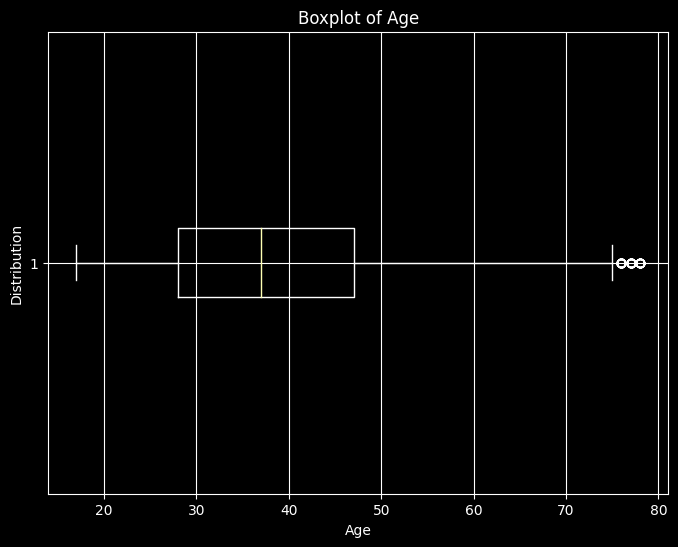

Minimum age: 17
Maximum age: 78


In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_without_outliers['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_age = df_without_outliers['age'].min()
max_age = df_without_outliers['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

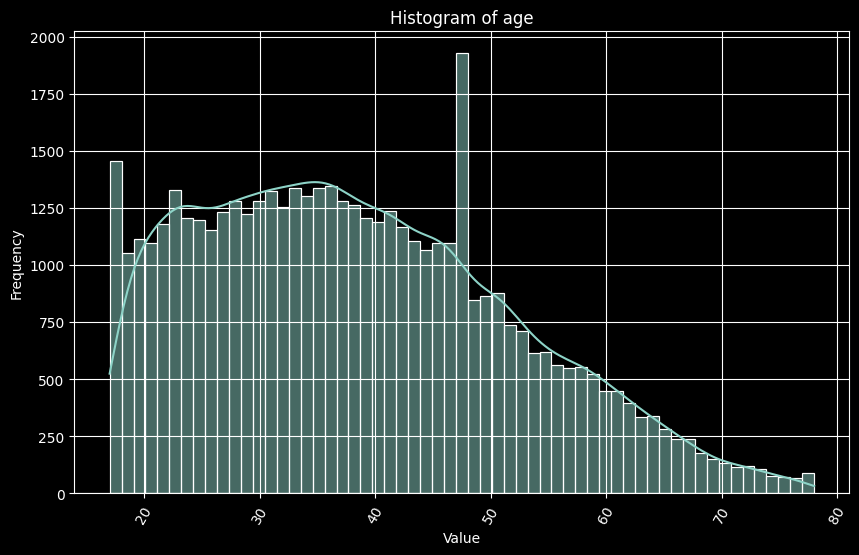

In [38]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=df_without_outliers, x='age', kde=True)
#df[column].hist()
plt.title(f'Histogram of age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

### **Feature Re-engineering**

In [27]:
sdf

NameError: name 'sdf' is not defined

**Grouping "workclass"**

In [ ]:
df_filled["workclass"].value_counts()

In [ ]:
private_num = df.eq("Private").sum()
Self_emp_num = df.eq("Self-emp-not-inc").sum()
Local_gov_num = df.eq("Local-gov").sum()
State_gov_num = df.eq("State-gov").sum()
Self_emp_inc_num = df.eq("Self-emp-inc").sum()
Federal_gov_num = df.eq("Federal-gov").sum()
Without_pay_num = df.eq("Without-pay").sum()
Never_worked_num = df.eq("Never-worked").sum()

print("Private_num: ", private_num, "\n")
print("Self_emp_num: ", Self_emp_num, "\n")
print("Local_gov_num: ", Local_gov_num, "\n")
print("State_gov_num: ", State_gov_num, "\n")
print("Self_emp_inc_num: ", Self_emp_inc_num, "\n")
print("Federal_gov_num: ", Federal_gov_num, "\n")
print("Without_pay_num: ", Without_pay_num, "\n")
print("Never_worked_num: ", Never_worked_num, "\n")

In [ ]:
df = df_filled.replace('Private', 'Private Sector', inplace = True)
df = df_filled.replace('Self-emp-not-inc', 'Private Sector', inplace = True)
df = df_filled.replace('Local-gov', 'Government Sector', inplace = True)
df = df_filled.replace('State-gov', 'Government Sector', inplace = True)
df = df_filled.replace('Federal-gov', 'Government Sector', inplace = True)
df = df_filled.replace('Self-emp-inc', 'Self-Employed', inplace = True)
df = df_filled.replace('Without-pay', 'Unemployed', inplace = True)
df = df_filled.replace('Never-worked', 'Unemployed', inplace = True)
df_filled['workclass'].value_counts()

**Grouping "age"**

In [ ]:
print(df_filled["age"].value_counts())
print("Total age categories: ", len(df_filled["age"].value_counts()))

In [ ]:
df_filled["age"].describe()

In [ ]:
def categorizing_age(age):
  if 17 <= age < 20:
    return "Teenager (14-19)"
  elif 20 <= age < 35:
    return "Young Adult (20-34)"
  elif 35 <= age < 60:
    return "Adult (35-59)"
  elif 60 <= age < 91:
    return "Senior/Elder (60-90)"
  else:
    return "Other"

df_filled["age"] = df_filled["age"].apply(categorizing_age)
df_filled["age"].value_counts()

**Grouping "relationship"**

In [ ]:
df_filled["relationship"].value_counts()

In [ ]:
df_filled['relationship'] = df_filled['relationship'].replace({'Husband': 'Spouse', 'Wife': 'Spouse', 'Not-in-family': 'Non-Family', 'Other-relative': 'Non-Family'})
df_filled['relationship'].value_counts()

**Grouping "Marital status"**

In [ ]:
df_filled["marital-status"].value_counts()

In [ ]:
marital_status_grouping = {
    'Married': ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
    'Never Married': ['Never-married'],
    'Divorced': ['Divorced', 'Separated'],
    'Widowed': ['Widowed']
}

df_filled['marital-status'] = df_filled['marital-status'].replace({'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married', 'Separated': 'Divorced'})
df_filled['marital-status'].value_counts()


**Grouping "native country"**

In [ ]:
df_filled["native-country"].value_counts()

In [ ]:
country_categories = {
    'North America': ['United-States', 'Mexico', 'Canada', 'Puerto-Rico'],
    'Central America': ['El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Haiti', 'Honduras', 'Trinadad&Tobago'],
    'South America': ['Columbia', 'Peru', 'Ecuador'],
    'Europe': ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Holand-Netherlands'],
    'Asia': ['Philippines', 'India', 'China', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Cambodia', 'Laos', 'Yugoslavia'],
    'Other': ['South', 'Hong', 'Nicaragua', 'Greece', 'Hungary', 'Outlying-US(Guam-USVI-etc)']
}

def categorizing_country(country):
  for group, types in country_categories.items():
    if country in types:
      return group

df_filled["native-country"] = df_filled["native-country"].apply(categorizing_country)
df_filled["native-country"].value_counts()

**Grouping "Occupation"**

In [ ]:
df_filled["occupation"].value_counts()

In [ ]:
def categorizing_occupation(df_filled):
  for index, row in df_filled.iterrows():
    occupation = row['occupation']
    if occupation in ["Prof-specialty", "Exec-managerial", "Tech-support"]:
      df_filled.at[index, f'occupation'] = 'Professional-Services'
    elif occupation in ["Craft-repair", "Machine-op-inspct"]:
      df_filled.at[index, f'occupation'] = 'Skilled-Trades'
    elif occupation in ["Handlers-cleaners", "Farming-fishing"]:
            df_filled.at[index, f'occupation'] = 'Manual-Labor'

categorizing_occupation(df_filled)

# Check value counts after categorization
print(df_filled["occupation"].value_counts())

**Grouping education**

In [ ]:
df_filled["occupation"].value_counts()

**Visualizing each column using a histogram**

In [ ]:
for column in df_filled.columns:
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    sns.histplot(data=df_filled, x=f'{column}', kde=True)
    #df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.grid(True)
    plt.show()